In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY = r"C:\Users\nirob\Downloads\Compressed\archive_2\sl_train"
CATAGORIES = []
temp = []
for path, subdirs, files in os.walk(DIRECTORY):
    temp.append(subdirs)
    
CATAGORIES = temp[0]
DATA = []
CATAGORIES


['sl_trainBeans_Angular_LeafSpot',
 'sl_trainBeans_Rust',
 'sl_trainStrawberry_Angular_LeafSpot',
 'sl_trainStrawberry_Anthracnose_Fruit_Rot',
 'sl_trainStrawberry_Blossom_Blight',
 'sl_trainStrawberry_Gray_Mold',
 'sl_trainStrawberry_Leaf_Spot',
 'sl_trainStrawberry_Powdery_Mildew_Fruit',
 'sl_trainStrawberry_Powdery_Mildew_Leaf',
 'sl_trainTomato_Blight',
 'sl_trainTomato_Leaf_Mold',
 'sl_trainTomato_Spider_Mites']

In [4]:
for name in CATAGORIES:
    folder = os.path.join(DIRECTORY,name)
    label = CATAGORIES.index(name)
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(100,100))
        #canny_image = cv2.Canny(img_arr,255,250)
        #canny_image = cv2.convertScaleAbs(canny_image)
        DATA.append([img_arr, label]) 
random.shuffle(DATA)
print("DONE")

DONE


In [8]:
x = []
y = []
for feature, lebel in DATA:
    x.append(feature)
    y.append(lebel)
    
x = np.array(x)
y = np.array(y)
y

array([ 9, 11, 10, ..., 10,  8,  1])

In [9]:
print(len(x))

5814


In [10]:
x.shape

(5814, 100, 100, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
print("Done")

Done


In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=x.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),input_shape=x.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(12,activation="softmax"))

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
model.fit(x, y, epochs=50)

Epoch 1/50
182/182 [==============================] - 76s 420ms/step - loss: 0.0671 - accuracy: 0.9866
Epoch 2/50
182/182 [==============================] - 94s 515ms/step - loss: 0.0348 - accuracy: 0.9940
Epoch 3/50
182/182 [==============================] - 96s 526ms/step - loss: 0.0573 - accuracy: 0.9909
Epoch 4/50
182/182 [==============================] - 94s 517ms/step - loss: 0.0546 - accuracy: 0.9921
Epoch 5/50
182/182 [==============================] - 93s 513ms/step - loss: 0.1580 - accuracy: 0.9604
Epoch 6/50
182/182 [==============================] - 95s 520ms/step - loss: 0.3174 - accuracy: 0.9212
Epoch 7/50
182/182 [==============================] - 95s 523ms/step - loss: 0.0517 - accuracy: 0.9904
Epoch 8/50
182/182 [==============================] - 95s 521ms/step - loss: 0.0520 - accuracy: 0.9942
Epoch 9/50
169/182 [==========================>...] - ETA: 6s - loss: 0.0136 - accuracy: 0.9985

KeyboardInterrupt: 

In [17]:
from keras.preprocessing import image

In [18]:
img_pred = tf.keras.utils.load_img(r"C:\Users\nirob\Downloads\Compressed\archive_2\sl_test\sl_testStrawberry_Leaf_Spot\leaf_spot1_jpg.rf.9d080c78e4c0789e861907a7b966f0a5.jpg", target_size=(100,100))        
img_pred = tf.keras.utils.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

In [21]:
rest = model.predict(img_pred)
print(rest)
print(len(rest[0]))
j = 0
pos = 1
while j < len(rest[0]):
    if rest[0][j] == 1:
        pos = j
        
    j+=1
print(CATAGORIES[pos])

1/1 [==============================] - 0s 40ms/step
[[3.1580240e-02 1.2355780e-01 1.0741095e-02 7.2248426e-04 4.0240638e-02
  3.6634225e-01 2.4911253e-01 2.3823592e-04 3.3647376e-03 1.7407264e-01
  2.3604045e-05 3.7784193e-06]]
12
sl_trainBeans_Rust


In [20]:
tDIRECTORY = r"C:\Users\nirob\Downloads\Compressed\archive_2\sl_valid"
tCATAGORIES = []
temp = []
for path, subdirs, files in os.walk(tDIRECTORY):
    temp.append(subdirs)
    
tCATAGORIES = temp[0]

tDATA = []
len(tCATAGORIES)

12

In [22]:
for name in tCATAGORIES:
    folder = os.path.join(tDIRECTORY,name)
    label = tCATAGORIES.index(name)
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(100,100))
        tDATA.append([img_arr, label]) 
random.shuffle(tDATA)
print("DONE")

DONE


In [23]:
tx = []
ty = []
for feature, lebel in tDATA:
    tx.append(feature)
    ty.append(lebel)
tx = np.array(x)
ty = np.array(y)
len(ty)

5814

In [24]:
results = model.evaluate(x, y)
print("test loss, test acc:", results)

182/182 [==============================] - 24s 129ms/step - loss: 0.0614 - accuracy: 0.9893
test loss, test acc: [0.06139456108212471, 0.9893360733985901]


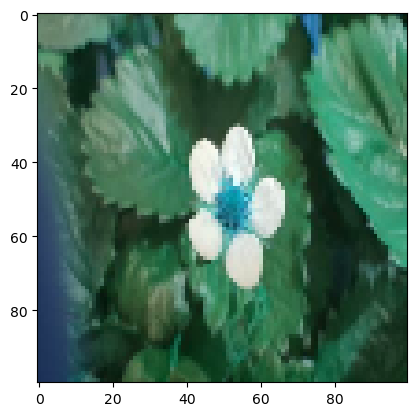

In [19]:
plt.imshow(tx[0])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 12)                2

In [21]:
filters, _ = model.layers[0].get_weights()
filters.shape

(3, 3, 3, 64)

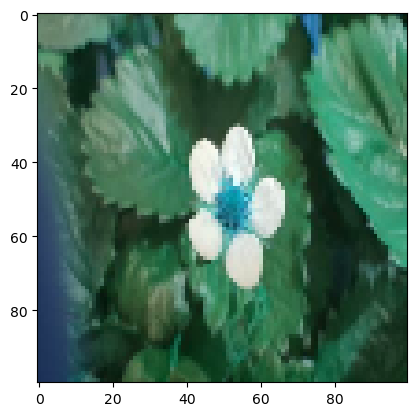

In [22]:
plt.imshow(tx[0])

In [23]:
tx[0][0][0]

array([0.38039216, 0.49803922, 0.38823529])

In [30]:
ims = cv2.imread(r"C:\Users\nirob\Downloads\Compressed\archive_2\sl_test\sl_testTomato_Spider_Mites\301b8b4c-f7d4-4626-b527-9f01cec643cf___Com-G_SpM_FL-8643_JPG_jpg.rf.911b78868dbb2f9ddac73eb0f07b56cc.jpg", cv2.IMREAD_COLOR)
cv2.namedWindow("Corners", cv2.WINDOW_NORMAL)
cv2.imshow("Corners",ims)
cv2.waitKey()

-1

In [36]:
canny_image = cv2.Canny(ims,255,250)
canny_image = cv2.convertScaleAbs(canny_image)


In [37]:
cv2.namedWindow("Corners", cv2.WINDOW_NORMAL)
cv2.imshow("Corners",canny_image)
cv2.waitKey()

-1

In [33]:
canny_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)